# BlackJack Basic Strategy Data Analysis

## Libraries

In [1]:
# libraries
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt

## Load of the Game Database

In [2]:
# attributes of the data base

load_dotenv()
DATABASE = os.getenv('DB_NAME')
USER = os.getenv("DB_USER")
PASSWORD = os.getenv('DB_PASSWORD')
HOST = os.getenv('DB_HOST')
PORT = os.getenv('DB_PORT')

In [3]:
# load of the database

engine = create_engine(f'postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}')
games = pd.read_sql_query("SELECT * FROM main.games;", engine)

## Exploratory Analysis

In [5]:
# Exploratoy

mean = games['final_balance'].mean()
mean

67.477

Text(0, 0.5, 'Final Balance')

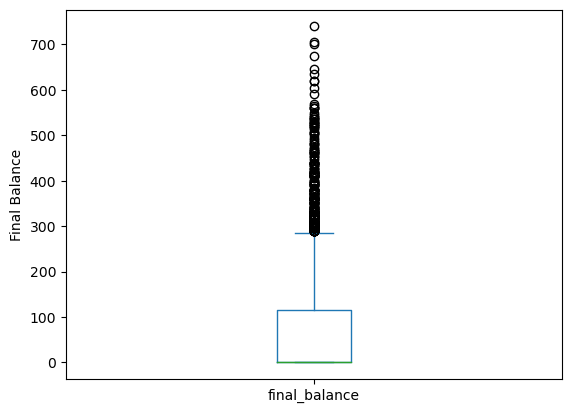

In [6]:
bxplt_f_balance = (games['final_balance']).plot.box()
bxplt_f_balance.set_ylabel('Final Balance')

Text(0.5, 0, 'Final Balance')

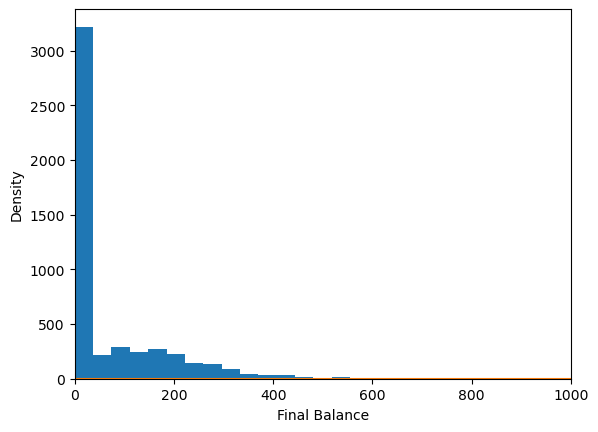

In [16]:
hist_f_balance = games['final_balance'].plot.hist(xlim =[0,1000], bins = 20)
games['final_balance'].plot.density(ax=hist_f_balance)
hist_f_balance.set_xlabel('Final Balance')

Text(0.5, 0, 'Profit')

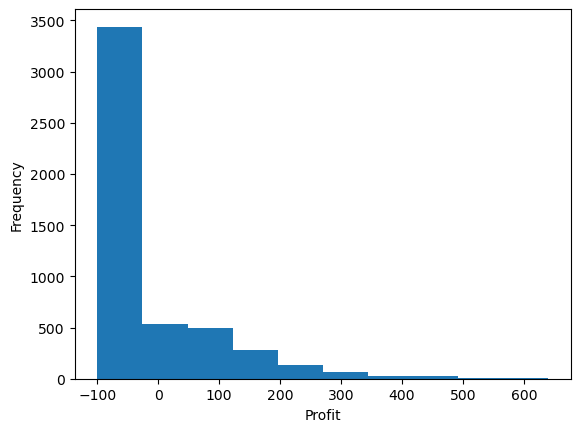

In [5]:
profit = np.array(games['final_balance'] - 100)
games['profit'] = profit

profit_hist = games['profit'].plot.hist(bins = 10)
profit_hist.set_xlabel('Profit')

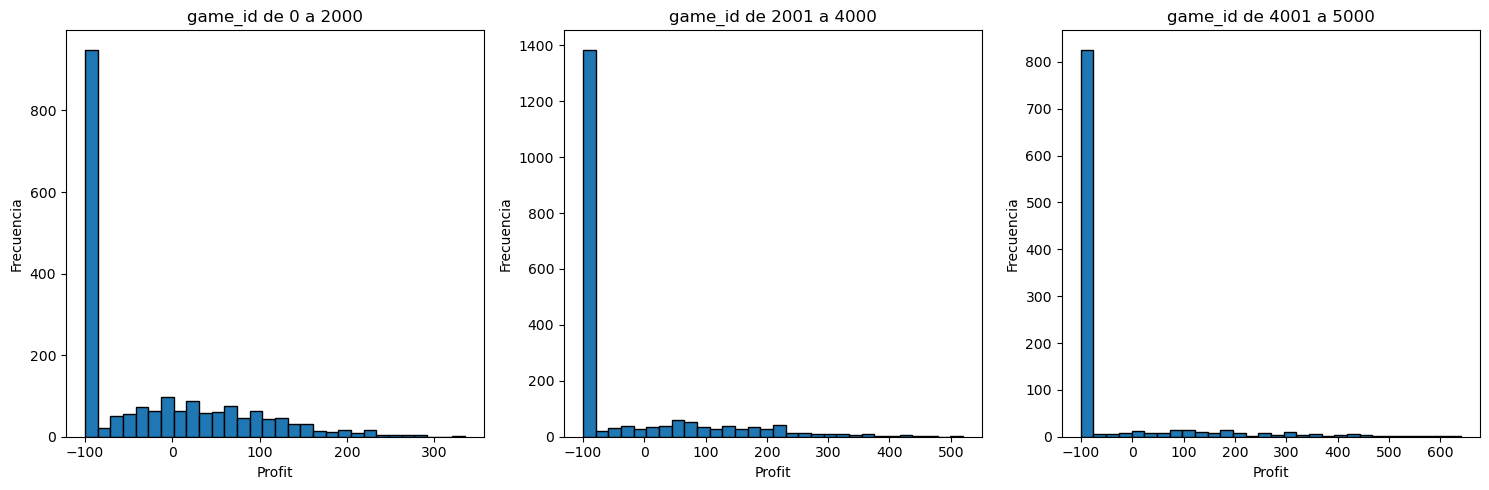

In [6]:
# Histograms for different rounds defined

ranges = [(0, 2000), (2001, 4000), (4001, 5000)]

fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(15, 5))

for ax, (start, end) in zip(axs, ranges):
    subset = games[(games['game_id'] >= start) & (games['game_id'] <= end)]
    ax.hist(subset['profit'], bins=30, edgecolor='black')
    ax.set_title(f'game_id de {start} a {end}')
    ax.set_xlabel('Profit')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()